In [1]:
#Carregando as imagens do diretorio
import os
current_dir = os.path.abspath(os.getcwd())

In [2]:
#Carregando as pastas que foram separadas anteriormente
folder = "\\cats_and_dogs_dataset"
train_folder = current_dir + folder + "\\train"
val_folder = current_dir + folder + "\\validation"
test_folder = current_dir + folder + "\\test"

In [3]:
#Somente para mostrar a versão do TensorFlow e a GPU que foi detectada
import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
#Método para carregar as pastas para dentro do tensorflow
#Passando o: 
# - Caminho da imagem 
# - O tamanho das imagens (trabalhando com redes neurais convulacionais as imagens precisam ter o mesmo tamanho)
# - De quantas em quantas imagens será ajustado o peso da rede neural

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(train_folder, image_size=(180,180),batch_size=32)

validation_dataset = image_dataset_from_directory(val_folder, image_size=(180,180),batch_size=32)

test_dataset = image_dataset_from_directory(test_folder, image_size=(180,180),batch_size=32)

#As "2 classes" retornadas são cachorro e gato

Found 17598 files belonging to 2 classes.
Found 2452 files belonging to 2 classes.
Found 4950 files belonging to 2 classes.


In [6]:
#Definindo as camadas da rede neural

#Simplifica a utilização do tensorflow, nosso 'frontend'
from tensorflow import keras
#As camadas da rede neural
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Normalização
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

#Definimos nosso modelo para utilizar o modelo sequencial (e não funcional)
model = keras.Sequential()

#Em cada model.add estamos adicionando uma nova camada

#Camada de normalização para representar as cores de todos os pixels para 0 e 1
model.add(Rescaling(scale=1.0/255))

#Camada de convolução, basicamente nos traz o shape do objeto
#Caminha pela imagem e representa só a borda
# - Quantidade de vezes que a convolução vai rodar na imagem (colocar mais gera overfitting), são os neuronios
# - Tamanho da janela que caminha pela imagem
# - Função de ativação para fazer o cálculo e disparar para a próxima camada
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#Camada de pooling
#Pega as imagens de borda e reduz 
#Caminhando pela imagens e mantendo somente os maiores valores das cores, nesse caso de 2 em 2. 
#Ajuda a resolver overfitting e busca relações maiores dentro da imagem
model.add(MaxPooling2D(pool_size=(2,2)))

#Mais uma camada de convolução para buscar relações mais complexas
#Olho com fucinho, fucinho com boca e afins
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))

#Adicionamos muito mais camadas para aprender relações cada vez mais complexas
#Porém quanto mais camadas mais chance de overfitting

#Transforma a imagem em um vetor
model.add(Flatten())

#Adiciona 1 neurônio denso do tipo sigmoid para classificador binário
model.add(Dense(1, activation="sigmoid"))

#Compilando a rede neural
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
#Agora iremos salvar a melhor versão do modelo treinado
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        #Nome do arquivo
        filepath="model1.keras",
        #Para salvar somente quando a rede chega no melhor resultado
        save_best_only=True,
        #
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
550/550 [==============================] - 161s 272ms/step - loss: 0.6748 - accuracy: 0.5576 - val_loss: 0.5969 - val_accuracy: 0.6684
Epoch 2/30
550/550 [==============================] - 157s 285ms/step - loss: 0.5271 - accuracy: 0.7369 - val_loss: 0.4701 - val_accuracy: 0.7826
Epoch 3/30
550/550 [==============================] - 180s 327ms/step - loss: 0.4196 - accuracy: 0.8082 - val_loss: 0.3771 - val_accuracy: 0.8365
Epoch 4/30
550/550 [==============================] - 206s 374ms/step - loss: 0.3550 - accuracy: 0.8435 - val_loss: 0.3518 - val_accuracy: 0.8365
Epoch 5/30
550/550 [==============================] - 243s 442ms/step - loss: 0.2960 - accuracy: 0.8730 - val_loss: 0.3058 - val_accuracy: 0.8695
Epoch 6/30
550/550 [==============================] - 227s 413ms/step - loss: 0.2363 - accuracy: 0.9015 - val_loss: 0.3012 - val_accuracy: 0.8670
Epoch 7/30
550/550 [==============================] - 237s 431ms/step - loss: 0.1867 - accuracy: 0.9226 - val_loss: 0.3222 -

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 41, 41, 128)      

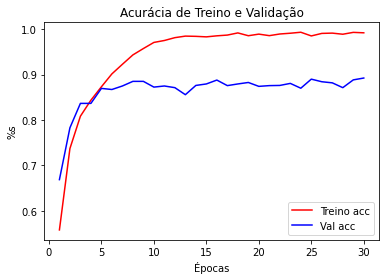

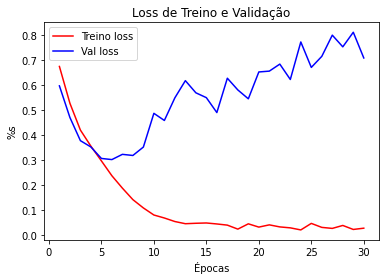

In [11]:
#Visualização de resultados
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Treino acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Acurácia de Treino e Validação")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Treino loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()

In [12]:
#Resultado geral da rede neural
#Importando o modelo já treinado
from tensorflow import keras
model = keras.models.load_model("model1.keras")

In [13]:
#Utilizando a base de dados de teste para validar a precisão do modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

155/155 [==============================] - 18s 112ms/step - loss: 0.3282 - accuracy: 0.8673
Test accuracy: 0.867
